<div class="alert alert-block alert-success">
    <h1 align="center">How To Detect Fraud In Crypto</h1>
    <h3 align="center">Fraud Detection</h3>
    
<a href="https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset/data">
Click for more information for dataset
    </a>
</div>

<img src='https://altairengineering.fr/images/default-source/resource-images/da_webinar_fraud-detection_email_header-jpg.jpg?sfvrsn=a796666_0' />


<div style="
    background-color:#e6f9e6;
    border-left:6px solid #4caf50;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Welcome to the Notebook...! 
    </p>
    <p style="margin-bottom:10px;">
        This notebook tackles Ethereum fraud detection: classifying addresses as legitimate or fraudulent using transaction features from on-chain.
    </p>
</div>



<div style="
    background-color:#e6f9e6;
    border-left:6px solid #4caf50;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="margin-bottom:10px;">
       This dataset contains rows of known fraud and valid transactions made over Ethereum, a type of cryptocurrency. Ethereum (ETH) remains one of the most significant digital assets in the global cryptocurrency ecosystem and is consistently ranked as the second-largest cryptocurrency by market capitalization, just behind Bitcoin. As of 2025, Ethereum continues to hold a substantial share of the overall crypto market, typically around 10–14% of total market cap worldwide, reflecting its sustained influence and adoption in the space. 
    </p>
    <p style="margin-bottom:10px;">
There are some distinct differences between Ethereum and the original crypto. Unlike Bitcoin (BTC), Ethereum is intended to be much more than just a medium of exchange or a store of value. Instead, Ethereum is a decentralized computing network built on blockchain technology.
    </p>
</div>


<div style="
    background-color:#e6f9e6;
    border-left:6px solid #4caf50;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        what is ERC20?
    </p>
    <p style="font-weight:bold;margin-bottom:10px;">
       Is ERC20 the same as ETH?
    </p>
    <p style="font-weight:bold;margin-bottom:10px;">
What's the difference between ETH and ERC20?
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
ETH, or “Ether,” is the native cryptocurrency of the Ethereum network, and is used to facilitate transactions on the Ethereum blockchain.
        </li>
           <li>
               Ethereum Request for Comment 20 (ERC-20) is the implemented standard for fungible tokens created using the Ethereum blockchain. ERC-20 guides the creation of new tokens on the Ethereum blockchain so that they are interchangeable with other smart contract tokens. ERC20 is the standard protocol for creating Ethereum-based tokens, which can be utilized and deployed in the Ethereum network.
        </li>
    </ul>
</div>

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        Topics:
    </p>
    <ul style="margin:0;padding-left:20px;">
        <li>Import the Dataset (transaction_dataset)</li>
        <li>Exploratory Data Analysis + Visualization</li>
        <li>Data Cleaning</li>
        <li>Preprocessing (Handling Missing Values, Encoding data, Scale & Cross-validation)</li>
        <li>Model building, performance evaluation</li>
        <li>Conclusion</li>
    </ul>
</div>

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        1. Load Libraries + Dataset
    </p>
</div>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.notebook import tqdm
import time
import math
#---
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
#---
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#---
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid",font_scale=1.5)
colors = plt.get_cmap('tab10').colors
#---
data = pd.read_csv('/kaggle/input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)
data.drop(columns=['Index', 'Address'], inplace=True)

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
We are able to create a class and define a number of features like colors , bold method and underline to use them in our notebook
        </li>
    </ul>
</div>

In [25]:
class color:
    BLUE = '\033[94m'
    GREEN = '\033[32m'
    BRIGHT_GREEN = '\033[92m'
    YELLOW = '\033[33m'
    BRIGHT_YELLOW = '\033[93m'
    RED = '\033[31m'
    BRIGHT_RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    BROWN = '\033[33m'
    DARK_BROWN = '\033[1;33m'
    END = '\033[0m'

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        1-1. Data Overview
    </p>
</div>

In [26]:
data.describe().style.\
set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#006600'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]) \
    .set_properties(**{'font-size': '14px', 'background-color': 'white', 'border-collapse': 'collapse', 'margin': '10px'})

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,218333.257652,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,10160.923338,11638.318630,0.000008,1477.395284,36.255659,129620673.243609,13868492.609469,110.939207,5.638038,7.598535,0.003440,4.901909,0.000000,0.000000,0.000000,0.000000,485.614688,125252360.152387,4346203.068974,11741.257297,13035935.151901,6318389.134577,0.000000,0.000000,0.000000,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,322937.925740,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,358322.711573,364204.773060,0.000516,242425.422882,447.528908,10538584109.427980,1180389999.859904,6128.634953,105.252500,81.818470,0.065698,17.246576,0.000000,0.000000,0.000000,0.000000,16883.278712,10537407457.234314,214119242.013432,1053567.123004,1179905145.260761,591476414.686329,0.000000,0.000000,0.000000,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15605352.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,316.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,0.226206,2.670424,0.000000,0.000621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,17.340000,509.770000,46637.030000,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,12.486800,30.529634,0.000000,0.001722,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,565.470000

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
We can see preliminary information about our dataset here , but I am interested in showing the information in much more details for better understanding.To do this , I create a function to describe in details each column an then we can easily understand whats going on for each one of them.
        </li>
    </ul>
</div>


In [27]:
def df_details(dataset=None):
    column = []
    dtype = []
    unique = []
    count = []
    missing = []
    missing_perecent =[]
    mean_ = []
    std_ = []
    min_ = []
    max_ = []
    skew_ = []
    for col in data.columns:
        column.append(col)
        dtype.append(data[col].dtype)
        unique.append(len(data[col].unique()))
        count.append(len(data[col]))
        missing.append(data[col].isna().sum())
        missing_perecent.append(round((data[col].isna().sum()/len(data))*100, 2))
        if data[col].dtype =='int' or data[col].dtype =='float':
            mean_.append(data[col].mean())
            std_.append(data[col].std())
            min_.append(data[col].min())
            max_.append(data[col].max())
            skew_.append(round(data[col].skew()))
        else:
            mean_.append(0)
            std_.append(0)
            min_.append(0)
            max_.append(0)
            skew_.append(0)
    data_info = pd.DataFrame({'Feature':column,
                                 'Dtype':dtype,
                                 'Unique':unique,
                                 'Count':count,
                                 'Missing_Value':missing,
                                 'Missing_Value_Percent':missing_perecent,
                                 'MEAN':mean_,
                                 'STD':std_,
                                 'MIN':min_,
                                 'MAX':max_,
                                 'SKEW':skew_
                                 })
    return data_info

df_details()

,Feature,Dtype,Unique,Count,Missing_Value,Missing_Value_Percent,MEAN,STD,MIN,MAX,SKEW
0,FLAG,int64,2,9841,0,0.00,2.214206e-01,4.152241e-01,0.00,1.000000e+00,1
1,Avg min between sent tnx,float64,5013,9841,0,0.00,5.086879e+03,2.148655e+04,0.00,4.302877e+05,8
2,Avg min between received tnx,float64,6223,9841,0,0.00,8.004851e+03,2.308171e+04,0.00,4.821755e+05,7
3,Time Diff between first and last (Mins),float64,7810,9841,0,0.00,2.183333e+05,3.229379e+05,0.00,1.954861e+06,2
4,Sent tnx,int64,641,9841,0,0.00,1.159317e+02,7.572264e+02,0.00,1.000000e+04,10
5,Received Tnx,int64,727,9841,0,0.00,1.637009e+02,9.408366e+02,0.00,1.000000e+04,9
6,Number of Created Contracts,int64,20,9841,0,0.00,3.729702e+00,1.414456e+02,0.00,9.995000e+03,52
7,Unique Received From Addresses,int64,256,9841,0,0.00,3.036094e+01,2.986211e+02,0.00,9.999000e+03,18
8,Unique Sent To Addresses,int64,258,9841,0,0.00,2.584016e+01,2.638204e+02,0.00,9.287000e+03,18
9,min value received,float64,4589,9841,0,0.00,4.384515e+01,3.259291e+02,0.00,1.000000e+04,23


<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
This dataset comprises 9,841 Ethereum addresses labeled for fraud detection.
        </li>
        <li>
At first glance, the number of features is quite large: 48 features along with the target variable. Therefore, in the following steps, it is necessary to identify unnecessary features and apply dimensionality reduction techniques for this purpose.
        </li>
        <li>
Additionally, some of the features contain missing values, which will be addressed in the next stages of the analysis.y.
        </li>
         <li>
Except for the last two features, which are of type object, all other features are numerical.
        </li>
         <li>
Most core features related to ETH transactions — such as transaction counts (Sent/Received Tnx), unique addresses, timing statistics (e.g., Avg min between sent/received tnx, Time Diff between first and last), and Ether values/balances (min/max/avg sent/received, total Ether balance) — have no missing values across all 9,841 samples.
        </li>
    </ul>
</div>

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        2. Exploratory Data Analysis + Data Cleaning
    </p>
</div>

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            1. Remove spaces in column names
         </li>
        </ul>
</div>

In [28]:
data.columns = data.columns.str.replace(' ', '_')

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            2. Checking Duplicate values
         </li>
        </ul>
</div>

In [29]:
print(f'{color.RED}Before: {color.END}{data.duplicated().sum()}')
data.drop_duplicates(inplace=True)
print(f'{color.GREEN}After: {color.END}{data.duplicated().sum()}')

Before: 546
After: 0


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            3. Checking Classes Distribution
         </li>
        </ul>
</div>

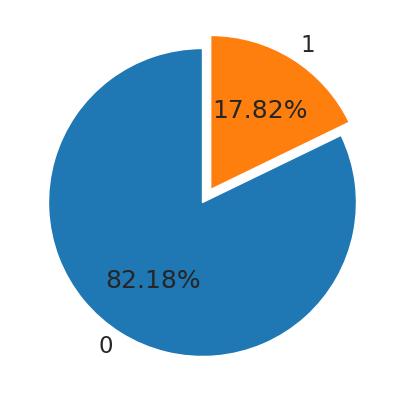

In [30]:
plt.figure(figsize=(7,5))
sizes = data.FLAG.value_counts()
labels = sizes.index
plt.pie(sizes,labels=labels,  autopct='%1.2f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.show()


<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
The distribution of the target variable (FLAG) shows that the classes are not balanced, with approximately 77.9% of the samples labeled as non-fraud (0) and 22.1% labeled as fraud (1). This class imbalance may negatively affect model performance, particularly in identifying fraudulent cases. Therefore, in the subsequent modeling stages, appropriate strategies will be considered to address this imbalance.
        </li>
    </ul>
</div>

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            4. Dropping redundant object-type features:
         </li>
        </ul>
</div>



In [31]:
#part1
# Turn object variables into 'category' dtype for more computation efficiency
categories = data.select_dtypes('O').columns.astype('category')
print(f'{data[categories]}')
print(f'{color.DARK_BROWN}{data[categories].isna().sum()}')

     _ERC20_most_sent_token_type        _ERC20_most_rec_token_type
0                      Cofoundit                         Numeraire
1                 Livepeer Token                    Livepeer Token
2                            NaN                             XENON
3                         Raiden                             XENON
4                  StatusNetwork                               EOS
...                          ...                               ...
9835                         NaN                               NaN
9836                                                    GSENetwork
9838                              Free BOB Tokens - BobsRepair.com
9839                         NaN                               NaN
9840                                                    INS Promo1

[9295 rows x 2 columns]
_ERC20_most_sent_token_type    2414
_ERC20_most_rec_token_type      591
dtype: int64


In [32]:
#part2 - Droped...
data.drop(data[categories], axis=1, inplace=True)

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
The two categorical features — ERC20 most sent token type (305 unique values, 27.41% missing) and ERC20_most_rec_token_type (467 unique values, 8.85% missing) — exhibit high cardinality and substantial missing values. One-hot encoding would introduce hundreds of sparse columns, significantly increasing dimensionality without clear benefit. Moreover, the core information about ERC20 diversity and activity is already captured in numerical features such as ERC20 uniq sent token name and ERC20 uniq rec token name. Therefore, we drop these columns to simplify the dataset and reduce noise. We will monitor model performance after removal and can revisit them if needed.
        </li>
    </ul>
</div>



<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            5. Drop Features with Variance=0
         </li>
        </ul>
</div>

In [33]:
#part1
features_var = data.var()
var_0 = features_var[(features_var==0)]
print(f'{color.DARK_BROWN}{var_0}')

_ERC20_avg_time_between_sent_tnx        0.0
_ERC20_avg_time_between_rec_tnx         0.0
_ERC20_avg_time_between_rec_2_tnx       0.0
_ERC20_avg_time_between_contract_tnx    0.0
_ERC20_min_val_sent_contract            0.0
_ERC20_max_val_sent_contract            0.0
_ERC20_avg_val_sent_contract            0.0
dtype: float64


In [34]:
#part2 - Droped...
drop_var = var_0.index.tolist()
data.drop(columns=drop_var,inplace=True)

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Several ERC20-related features exhibit zero variance (standard deviation = 0.0) across the dataset, meaning they take the same constant value for all samples with non-missing data. These features provide no discriminative information and cannot contribute to distinguishing fraudulent from legitimate accounts. To reduce redundancy and prevent potential issues in modeling, we remove these constant features from the dataset.
        </li>
    </ul>
</div>








<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            6. Drop the columns that contain a very high proportion of zero values.
         </li>
        </ul>
</div>

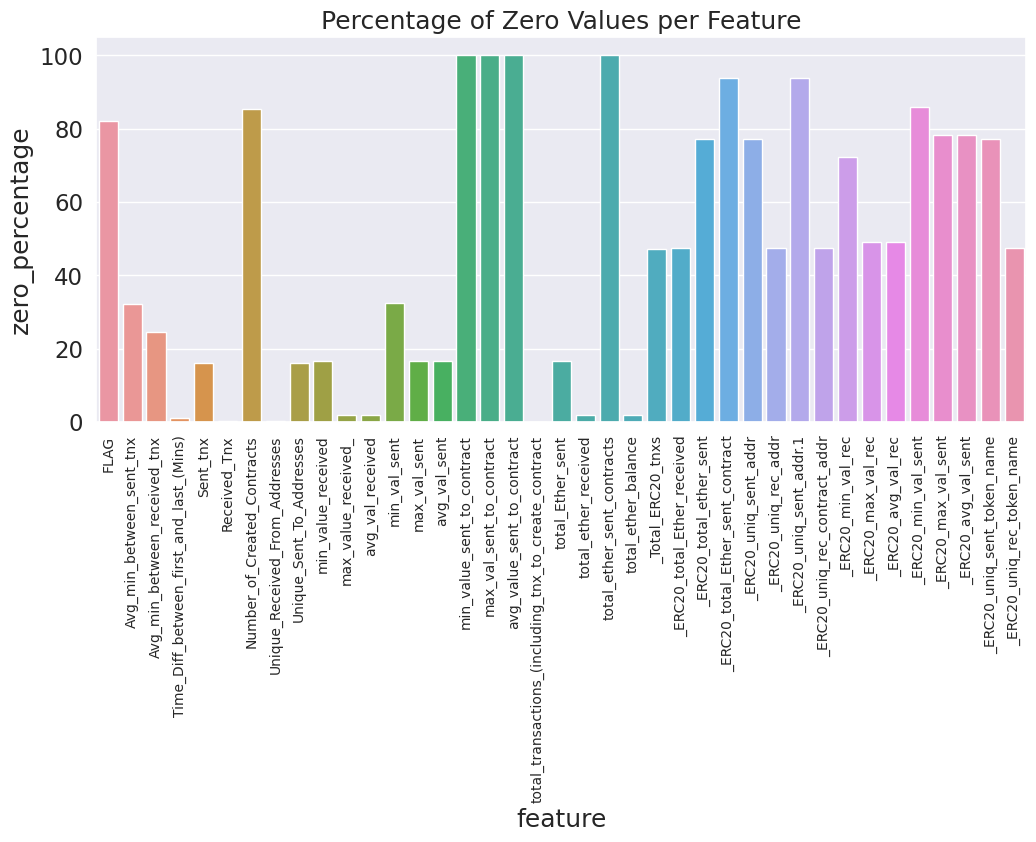

In [35]:
#part1
def show_zero_values(): 
    global zero_values
    zero_values = {}

    for cols in data.columns:
        zero_values[cols] = (data[cols] == 0).sum() / len(data) * 100

    zero_df = pd.DataFrame(
        list(zero_values.items()),
        columns=['feature', 'zero_percentage']
    )

    plt.figure(figsize=(12,5))
    sns.barplot(
        data=zero_df,
        x='feature',
        y='zero_percentage'
    )
    plt.tick_params(axis='x', rotation=90, labelsize=10)
    plt.title('Percentage of Zero Values per Feature')
    plt.show()

show_zero_values()

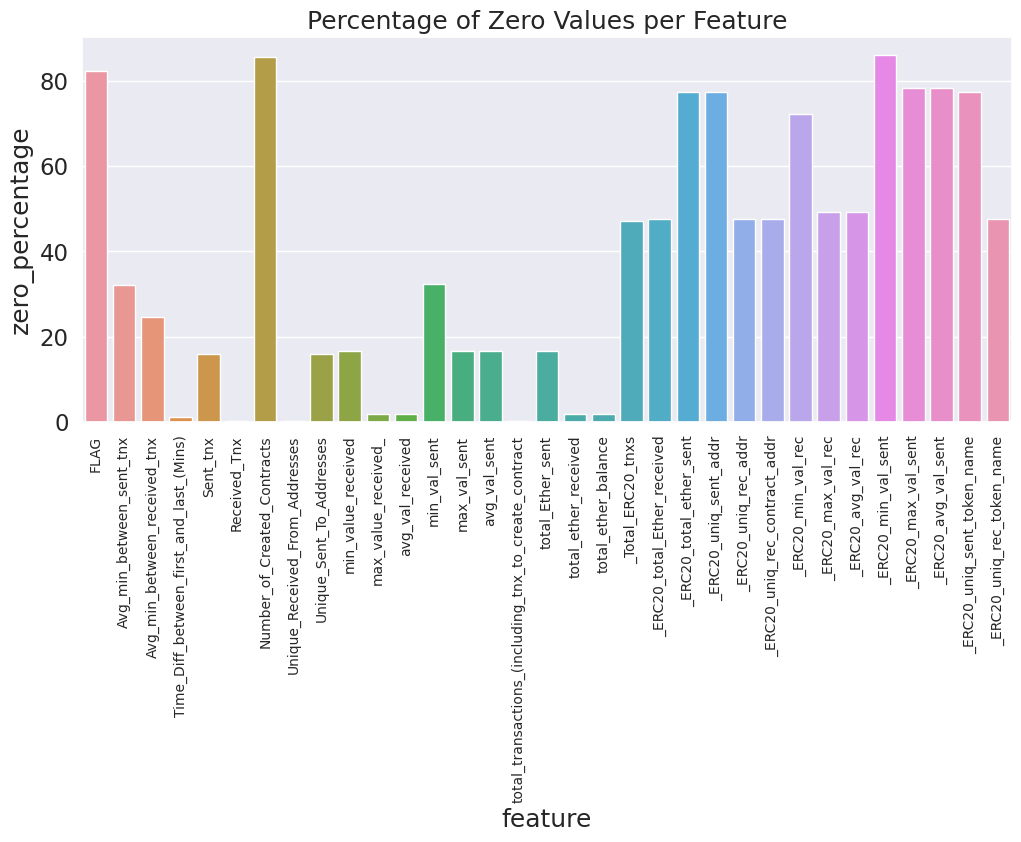

 Shape: (9295, 33)


In [36]:
#part2 - dropping:
drop_zero_features=[]
for keys, values in zero_values.items():
    if keys =='FLAG':
        continue
    if values >90:
        drop_zero_features.append(keys)
data.drop(columns=drop_zero_features,inplace=True)
show_zero_values()
print(f'{color.GREEN} Shape: {data.shape}')

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            7. Drop one of those highly correlated features
         </li>
        </ul>
</div>

In [37]:
#part1
corr = data.corr()
mask = (corr.abs() >= 0.8) & (corr != 1.0)
high_corr = corr.where(mask).stack().reset_index()
print(f'{color.GREEN}Examination of features that have a correlation higher than 80% with each other:')
display(high_corr[high_corr['level_0'] < high_corr['level_1']].sort_values(by=0,ascending=False))

Examination of features that have a correlation higher than 80% with each other:


,level_0,level_1,0
8,_ERC20_max_val_rec,_ERC20_total_Ether_received,0.999967
20,_ERC20_avg_val_sent,_ERC20_max_val_sent,0.999952
19,_ERC20_avg_val_sent,_ERC20_min_val_sent,0.999785
16,_ERC20_max_val_sent,_ERC20_min_val_sent,0.999729
15,_ERC20_max_val_sent,_ERC20_total_ether_sent,0.999649
7,_ERC20_uniq_rec_contract_addr,_ERC20_uniq_rec_token_name,0.999640
18,_ERC20_avg_val_sent,_ERC20_total_ether_sent,0.999566
12,_ERC20_min_val_sent,_ERC20_total_ether_sent,0.999311
10,_ERC20_avg_val_rec,_ERC20_total_Ether_received,0.859822
11,_ERC20_avg_val_rec,_ERC20_max_val_rec,0.859765


<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Having examined inter-feature correlations and identified several highly correlated pairs, we proceed by retaining, from each pair, only the feature with the higher Mutual Information (MI) score with the target variable (FLAG). This univariate feature selection approach ensures we reduce multicollinearity while preserving the most informative features for fraud detection.
        </li>
    </ul>
</div>








<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            7-1. Mutual Information for Non-Linear Feature Elimination: 
         </li>
        </ul>
</div>

                                                           0
Time_Diff_between_first_and_last_(Mins)             0.172314
_ERC20_avg_val_rec                                  0.123717
_ERC20_min_val_rec                                  0.121300
max_value_received_                                 0.110499
total_ether_balance                                 0.108415
avg_val_received                                    0.105352
Avg_min_between_received_tnx                        0.103687
total_ether_received                                0.091231
min_value_received                                  0.087883
total_Ether_sent                                    0.078120
_ERC20_total_Ether_received                         0.069849
_ERC20_max_val_rec                                  0.069772
_Total_ERC20_tnxs                                   0.068656
Avg_min_between_sent_tnx                            0.062509
_ERC20_uniq_rec_token_name                          0.060611
max_val_sent            

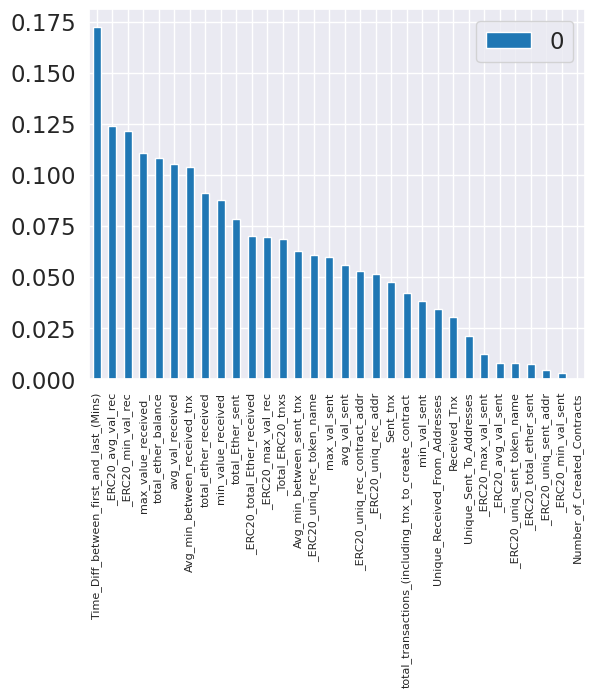

In [38]:
data2 = data.copy()
data2.fillna(data2.median(), inplace=True)
x_mi=data2.drop(columns='FLAG')
y_mi=data2.FLAG
mi =mutual_info_classif(X=x_mi , y=y_mi)
df_mi = pd.DataFrame(mi.reshape(1,-1), columns=x_mi.columns.to_list()).T
ax = df_mi.sort_values(by=0, ascending=False).plot(kind='bar', color=colors)
ax.tick_params(axis='x', labelsize=8)
print(df_mi.sort_values(by=0, ascending=False))

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
     <p style="margin-bottom:10px;text-align:justify;">
        From previous analysis, we identified several features that:Show strong linear correlation with each other (providing largely redundant information),  Yet have very weak non-linear relationship with the target variable (FLAG), as measured by Mutual Information.
    </p>
     <p style="margin-bottom:10px;text-align:justify;">
        In simple terms, these features add almost no useful signal for detecting fraud—they mainly increase data dimensionality and unnecessary model complexity.Therefore, we remove them in this section to:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
            Simplify the model.
        </li>
        <li>
            Reduce the risk of overfitting.
        </li>
        <li>
            And achieve better generalization and performance on unseen data.
        </li>
    </ul>
</div>

In [39]:
drop_cols = [
    "total_transactions_(including_tnx_to_create_contract",
    "Sent_tnx",
    "Received_Tnx",
    "min_val_sent",
    "Unique_Received_From_Addresses",
    "Unique_Sent_To_Addresses",
    "_ERC20_avg_val_sent",
    "_ERC20_max_val_sent",
    "_ERC20_uniq_sent_token_name",
    "_ERC20_total_ether_sent",
    "_ERC20_uniq_sent_addr",
    "_ERC20_min_val_sent",
    "Number_of_Created_Contracts"
]
data.drop(columns=drop_cols, inplace=True)
data.fillna(data.mean(), inplace=True)
print(f'{color.GREEN}Shape: {color.END}{data2.shape}')

Shape: (9295, 33)


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:16px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Spliting Data
         </li>
        </ul>
</div>

In [40]:
X = data.drop(columns='FLAG')
y = data.FLAG
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <p style="font-weight:bold;margin-bottom:10px;">
        Tip:
    </p>
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
           As observed earlier, the target variable (FLAG) exhibits significant class imbalance (17.82% fraudulent vs. 82.18% legitimate accounts). In the following steps, we will apply the SMOTE (Synthetic Minority Over-sampling Technique) method to balance the classes, ensuring more reliable modeling and evaluation. 
         </li>
        </ul>
</div>









In [41]:
print(f"{color.RED}Before: \n{color.END}{y_train.value_counts()}")
smoth = SMOTE()
X_sm_train, y_sm_train = smoth.fit_resample(X_train, y_train)

print(f"{color.GREEN}\nAfter Using Smote: \n{color.END}{y_sm_train.value_counts()}")

Before: 
FLAG
0    6113
1    1323
Name: count, dtype: int64

After Using Smote: 
FLAG
0    6113
1    6113
Name: count, dtype: int64


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:16px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Scaling Data
         </li>
        </ul>
</div>

In [42]:
scaler = StandardScaler()
X_sm_train = scaler.fit_transform(X_sm_train)
X_test = scaler.transform(X_test)

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        3. Modeling
    </p>
</div>

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
            In the following, the dataset is evaluated using Three different algorithms(Xgboost,Random Forest, LGBM), and their outputs are analyzed.
        </li>
    </ul>
</div>


In [54]:
#part1
model_name = []
acc_train = []
recall_train = []
precision_train = []
f1_train = []
#---
acc_test = []
recall_test = []
precision_test = []
f1_test = []
time_score =[]
#---
conf_matrices = []

def model_prediction(model):
    name=str(model).split('(')[0]
    model_name.append(name)
    start_time = time.time()
    model.fit(X_sm_train, y_sm_train)
    y_pred = model.predict(X_test)
    metrics=cross_validate(estimator=model, X=X_sm_train, y=y_sm_train, cv=5, scoring=['accuracy', 'precision', 'recall','f1'])
    acc_train.append(round(metrics['test_accuracy'].mean(),2))
    recall_train.append(round(metrics['test_recall'].mean(),2))
    precision_train.append(round(metrics['test_precision'].mean(),2))
    f1_train.append(round(metrics['test_f1'].mean(),2))
    #----test
    acc_test.append(round(accuracy_score(y_test, y_pred),2))
    recall_test.append(round(recall_score(y_test, y_pred),2))
    precision_test.append(round(precision_score(y_test, y_pred),2))
    f1_test.append(round(f1_score(y_test, y_pred),2))
    end_time = time.time()
    time_score.append(round(end_time - start_time,4))
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

In [55]:
#part2
models=[ LGBMClassifier(verbose=-1), XGBClassifier(), RandomForestClassifier()]
for model in tqdm(models):
    model_prediction(model)

#part3
all_models = pd.DataFrame({
    'Name':model_name,
    'Acc_Train':acc_train,
    'Precision_Train':precision_train,
    'Recall_Train':recall_train,
    'F1_Train':f1_train,
    'Acc_Test':acc_test,
    'Precision_Test':precision_test,
    'Recall_Test':recall_test,
    'F1_Test':f1_test,
    'Total_Time':time_score,
    
})
#--------------------------------------Display:
f1_train_test = ['F1_Train', 'F1_Test']
total_time = ['Total_Time']

all_models.sort_values(by='F1_Test', ascending=False).style \
  .highlight_max(subset=f1_train_test, color='#a8e6cf') \
  .highlight_min(subset=total_time, color='#ffcccb') \
  .set_properties(**{
      'border': '1px solid #ccc',
      'text-align': 'center'
  }) \
  .hide(axis='index')

  0%|          | 0/3 [00:00<?, ?it/s]

Name,Acc_Train,Precision_Train,Recall_Train,F1_Train,Acc_Test,Precision_Test,Recall_Test,F1_Test,Total_Time
LGBMClassifier,0.980000,0.980000,0.980000,0.980000,0.980000,0.940000,0.930000,0.930000,2.610400
XGBClassifier,0.990000,0.990000,0.980000,0.990000,0.970000,0.940000,0.920000,0.930000,1.772900
RandomForestClassifier,0.980000,0.980000,0.980000,0.980000,0.970000,0.920000,0.910000,0.920000,18.278600


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:16px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Analyzing False Positive and False Negative Rates from the Confusion Matrix
         </li>
        </ul>
</div>




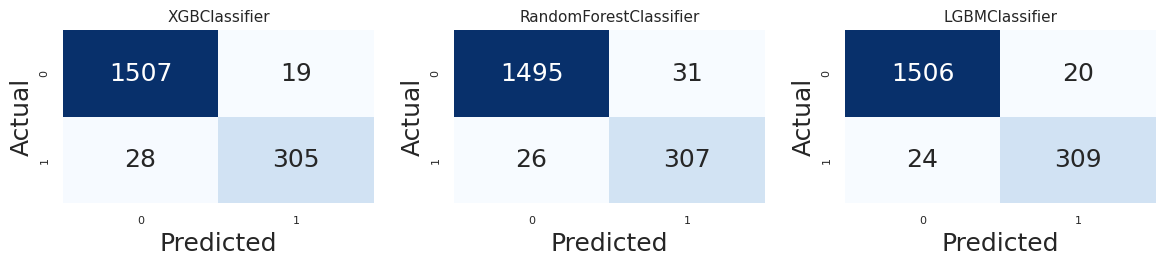

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(3*4, 1*3))
axes = axes.flatten()
for i, cm in enumerate(conf_matrices):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        ax=axes[i]
    )
    axes[i].set_title(f'{model_name[i]}', fontsize=11)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

<div style="
    background-color:#FFD1D1;
    border-left:6px solid #FF0000;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Among the three models evaluated (XGBoost, Random Forest, and LightGBM), LightGBM demonstrates the lowest false positive and false negative rates in detecting fraudulent samples. Nevertheless, there remains room for improvement, and exploring additional models or further tuning could yield even better performance.
        </li>
    </ul>
</div>


<div
    style="
        background-color:#e6f9e6;
        border-left:6px solid #4caf50;
        padding: 20px;
        border-radius: 8px;
        margin: 20px 0;
        font-size: 16px;
        line-height: 1.6;
    "
>
    <h2 style="text-align: center; color: #4caf50; margin-top: 0;">
        Project Summary - Key Highlights
    </h2>
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <p style="font-weight:bold;margin-bottom:10px;">
        This project focuses on Ethereum fraud detection using transaction-based features to classify accounts as legitimate or fraudulent.
    </p>
    <ul style="padding-left: 25px; text-align: justify;">
        <li>
           Exploratory Data Analysis : Conducted a thorough examination of feature distributions, missing values, zero-value percentages, and class imbalance to understand the dataset's characteristics.
        </li>
        <li>
Visualization: Created bar plots for zero-value percentages, correlation heatmaps, and distribution charts to visually identify patterns, redundancies, and key differences between fraudulent and legitimate accounts.
        </li>
        <li>
Data Cleaning: Removed zero-variance features, high-zero-percentage columns, redundant categorical features, and highly correlated pairs to reduce dimensionality and multicollinearity.
        </li>
        <li>
Class Balancing: Applied SMOTE (Synthetic Minority Over-sampling Technique) on the training set to address the significant class imbalance (~82% legitimate vs. ~18% fraudulent).
        </li>
        <li>
Data Scaling:Standardized numerical features using StandardScaler to ensure consistent scale across variables, improving model training stability and performance.
        </li>
        <li>
Model Building and Evaluation: Trained and compared XGBoost, Random Forest, and LightGBM models; evaluated performance using confusion matrices and metrics, with LightGBM showing the lowest false positive and false negative rates.
        </li>
        <li>
        Conclusion: The final LightGBM model achieved strong performance on fraud detection; further improvements could be explored through additional feature engineering, hyperparameter tuning, or ensemble methods.
        </li>
    </ul>
    </p>
</div>